In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

# 1. Import the Data

In [12]:
df = pd.read_csv("all_data.csv")
df

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30,"77,860,932,152.00"
1,Chile,2001,77.30,"70,979,923,960.00"
2,Chile,2002,77.80,"69,736,811,435.00"
3,Chile,2003,77.90,"75,643,459,840.00"
4,Chile,2004,78.00,"99,210,392,858.00"
...,...,...,...,...
91,Zimbabwe,2011,54.90,"12,098,450,749.00"
92,Zimbabwe,2012,56.60,"14,242,490,252.00"
93,Zimbabwe,2013,58.00,"15,451,768,659.00"
94,Zimbabwe,2014,59.20,"15,891,049,236.00"


# 2. EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,96.00,"2,007.50",4.63,"2,000.00","2,003.75","2,007.50","2,011.25","2,015.00"
Life expectancy at birth (years),96.00,72.79,10.67,44.30,74.47,76.75,78.90,81.00
GDP,96.00,"3,880,498,570,768.40","5,197,561,310,975.92","4,415,702,800.00","173,301,750,000.00","1,280,220,000,000.00","4,067,510,000,000.00","18,100,000,000,000.00"


In [24]:
country_mean = df.groupby("Country")[["Life expectancy at birth (years)", "GDP"]].mean()
country_mean

,Life expectancy at birth (years),GDP
Country,,
Chile,78.94,"169,788,845,015.31"
China,74.26,"4,957,713,750,000.00"
Germany,79.66,"3,094,775,625,000.00"
Mexico,75.72,"976,650,625,000.00"
United States of America,78.06,"14,075,000,000,000.00"
Zimbabwe,50.09,"9,062,579,595.06"


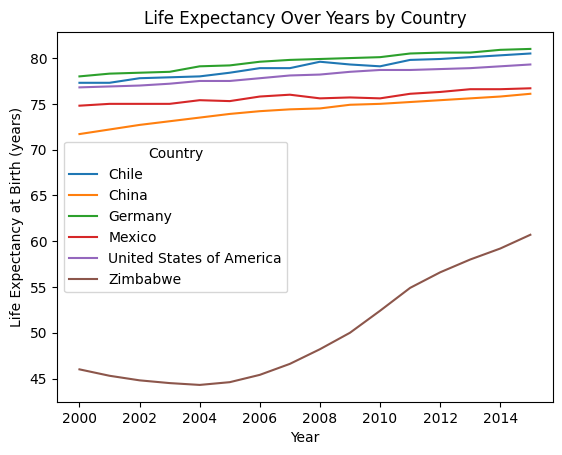

In [29]:
sns.lineplot(data=df, x="Year", y="Life expectancy at birth (years)", hue="Country")

plt.title('Life Expectancy Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend(title='Country')
plt.show()


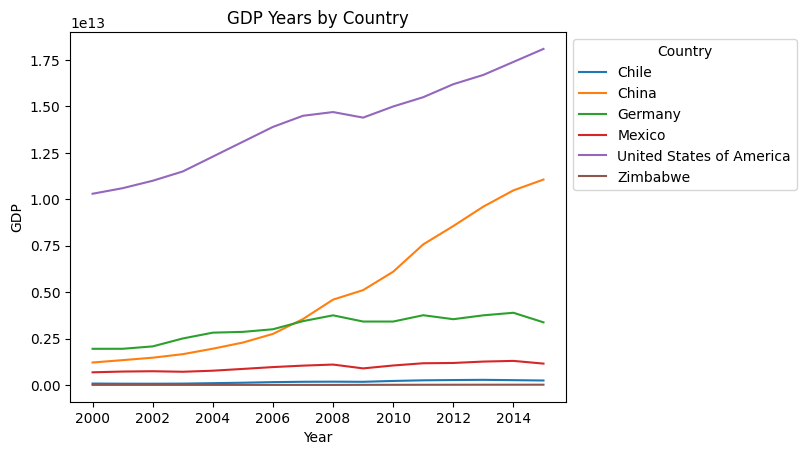

In [33]:
ax = sns.lineplot(data=df, x="Year", y="GDP", hue="Country")

plt.title('GDP Years by Country')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

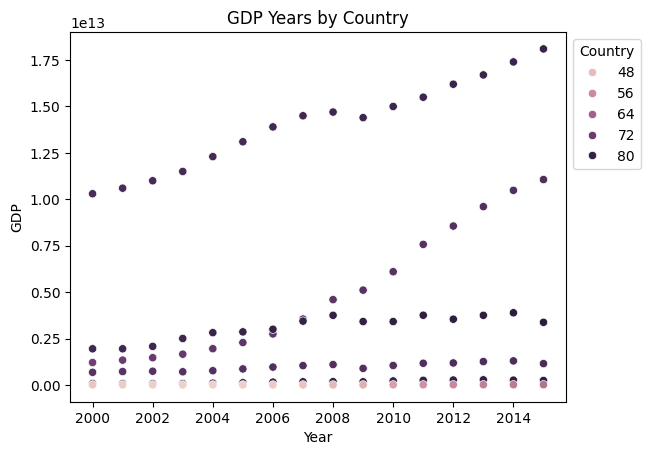

In [ ]:
ax = sns.scatterplot(data=df, x="Year", y="GDP", hue="Life expectancy at birth (years)")

plt.title('GDP Years by Country')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))